In [193]:
import pandas as pd
import numpy as np
import seaborn as sns

import scipy.stats as stats
from sklearn.metrics import r2_score, adjusted_rand_score

import matplotlib.pyplot as plt

In [88]:
# read in cold counts
data_path = './data/'
cold_counts = pd.read_csv(data_path+'cold_ballinger_counts.csv',header = 0,index_col=0)

In [89]:
metadata = pd.read_csv(data_path + 'ballinger_metadata.csv')
metadata

,Unnamed: 0,Sample,Allele,Temperature,Tissue,Individual
0,0,MBSD_002.counts,P1,Warm,Liver,MBSD
1,1,MBSD_003.counts,P1,Warm,Liver,MBSD
2,2,MBSD_009.counts,P1,Warm,Liver,MBSD
3,3,MBSD_012.counts,P1,Warm,Liver,MBSD
4,4,MBSD_013.counts,P1,Warm,Liver,MBSD
...,...,...,...,...,...,...
91,91,X182_coldM_geno2,H2,Cold,BAT,X182
92,92,X187_coldM_geno2,H2,Cold,BAT,X187
93,93,X192_coldM_geno2,H2,Cold,BAT,X192
94,94,X194_coldM_geno2,H2,Cold,BAT,X194


In [165]:
results_path = './results/'
weights_dom = pd.read_csv(f'{results_path}BATcold_weights_dominant.csv',header=0,index_col=0)
weights_add = pd.read_csv(f'{results_path}BATcold_weights_log_additive.csv',header=0,index_col=0)
weights_free = pd.read_csv(f'{results_path}BATcold_weights_free.csv',header=0,index_col=0)


sig_dom = pd.read_csv(f'{results_path}BATcold_sig_dominant.csv',header=0,index_col=0)
sig_add = pd.read_csv(f'{results_path}BATcold_sig_log_additive.csv',header=0,index_col=0)
sig_free = pd.read_csv(f'{results_path}BATcold_sig_free.csv',header=0,index_col=0)

# fitted_vals_dom = pd.read_csv('../results/ballinger/cold_fitted_vals_dominant.csv',header=0).values
# fitted_vals_add = pd.read_csv('../results/ballinger/cold_fitted_vals_log_additive.csv',header=0).values
# fitted_vals_free = pd.read_csv('../results/ballinger/cold_fitted_vals_free.csv',header=0).values

counts_norm = cold_counts.div(cold_counts.sum(axis=0), axis=1)

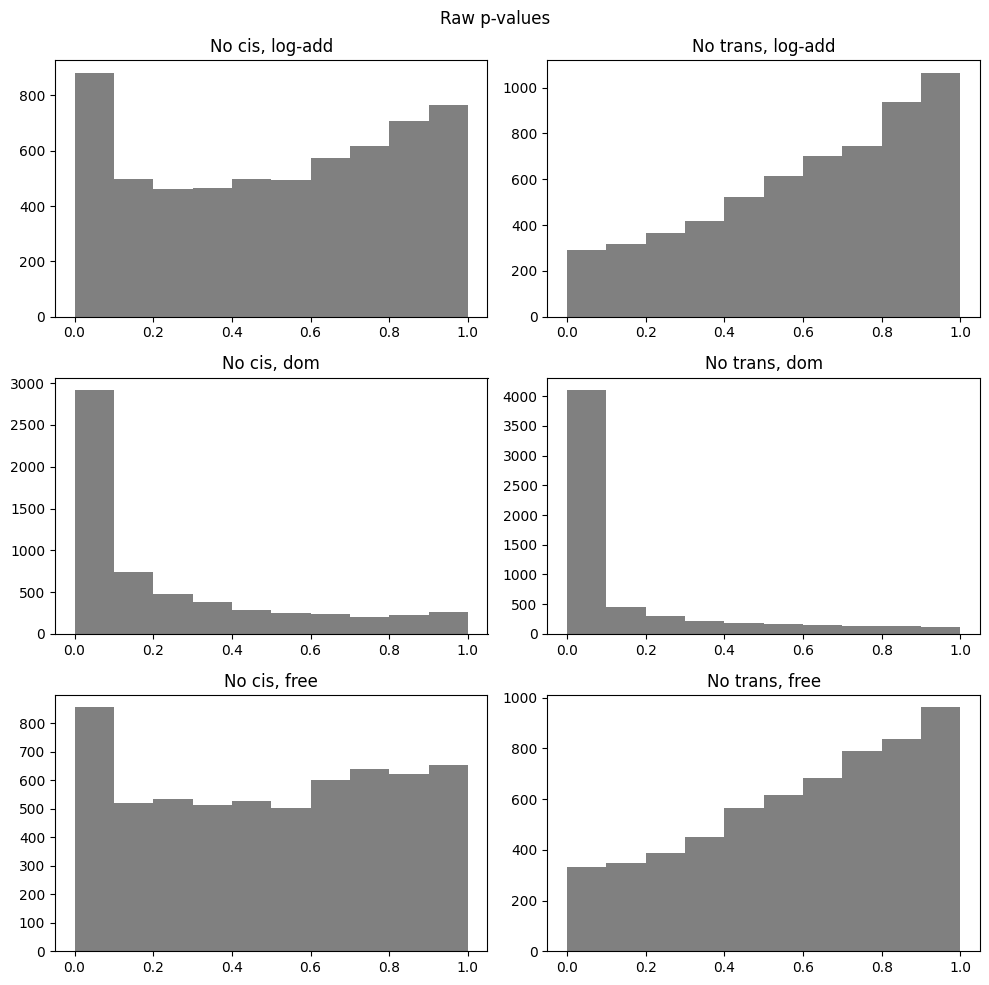

In [166]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(sig_add.raw_pval_beta_cis,color='gray')
ax[0,0].set_title('No cis, log-add')
ax[0,1].hist(sig_add.raw_pval_beta_trans,color='gray')
ax[0,1].set_title('No trans, log-add')

ax[1,0].hist(sig_dom.raw_pval_beta_cis,color='gray')
ax[1,0].set_title('No cis, dom')
ax[1,1].hist(sig_dom.raw_pval_beta_trans,color='gray')
ax[1,1].set_title('No trans, dom')

ax[2,0].hist(sig_free.raw_pval_beta_cis,color='gray')
ax[2,0].set_title('No cis, free')
ax[2,1].hist(sig_free.raw_pval_beta_trans,color='gray')
ax[2,1].set_title('No trans, free')

plt.suptitle('Raw p-values')

plt.tight_layout()

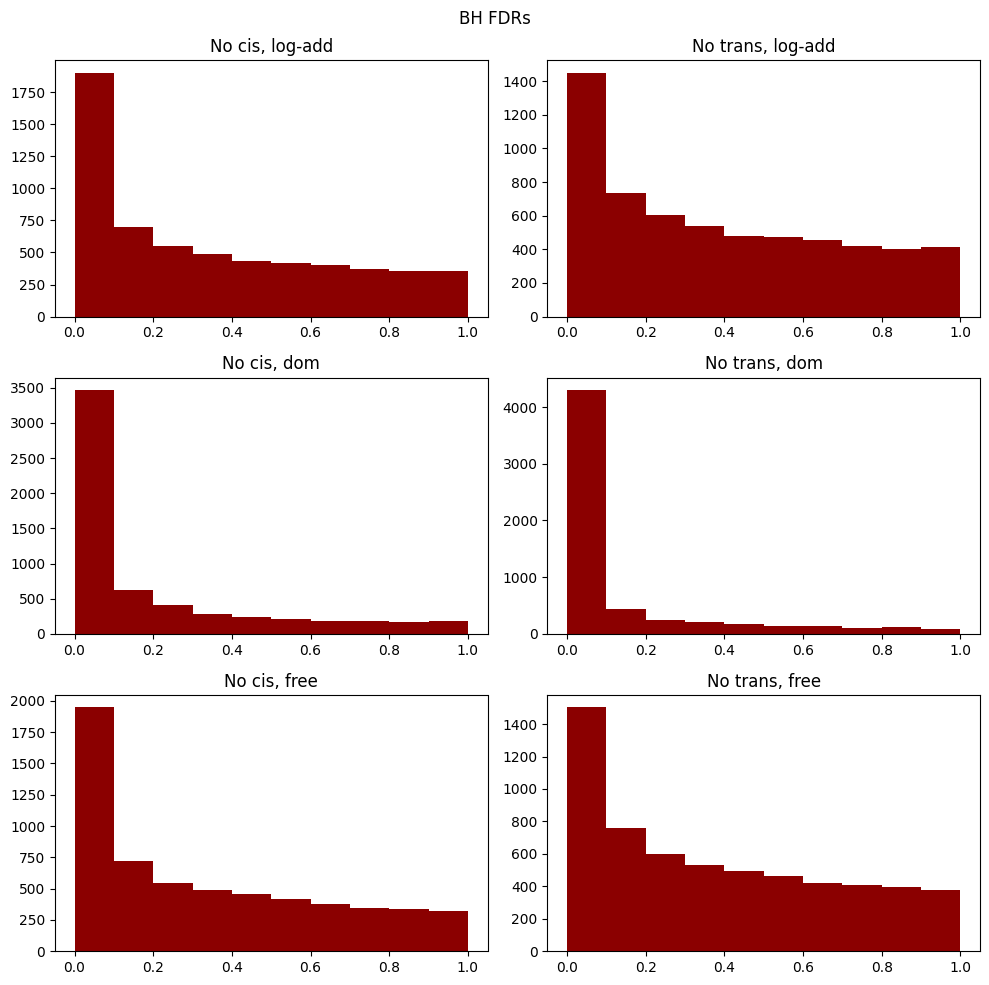

In [167]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].hist(sig_add.BH_FDR_beta_cis,color='darkred')
ax[0,0].set_title('No cis, log-add')
ax[0,1].hist(sig_add.BH_FDR_beta_trans,color='darkred')
ax[0,1].set_title('No trans, log-add')

ax[1,0].hist(sig_dom.BH_FDR_beta_cis,color='darkred')
ax[1,0].set_title('No cis, dom')
ax[1,1].hist(sig_dom.BH_FDR_beta_trans,color='darkred')
ax[1,1].set_title('No trans, dom')

ax[2,0].hist(sig_free.BH_FDR_beta_cis,color='darkred')
ax[2,0].set_title('No cis, free')
ax[2,1].hist(sig_free.BH_FDR_beta_trans,color='darkred')
ax[2,1].set_title('No trans, free')

plt.suptitle('BH FDRs')

plt.tight_layout()

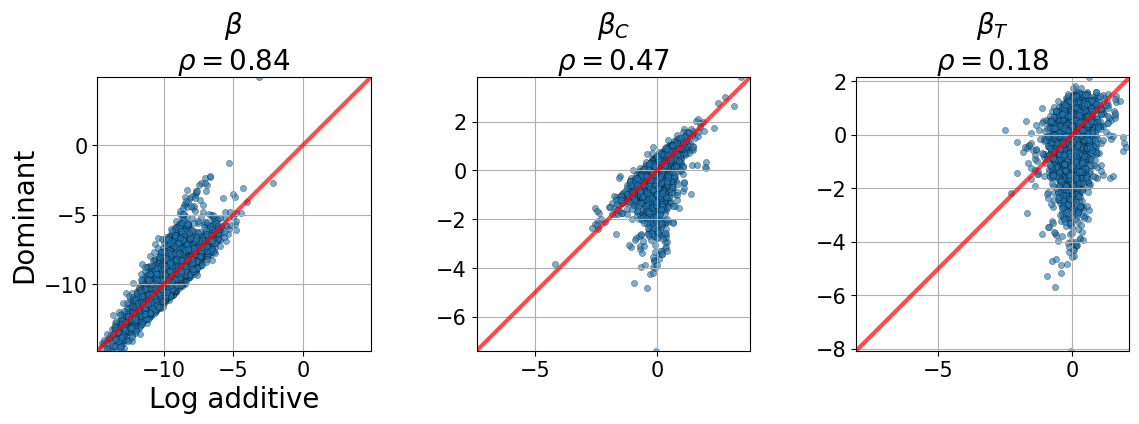

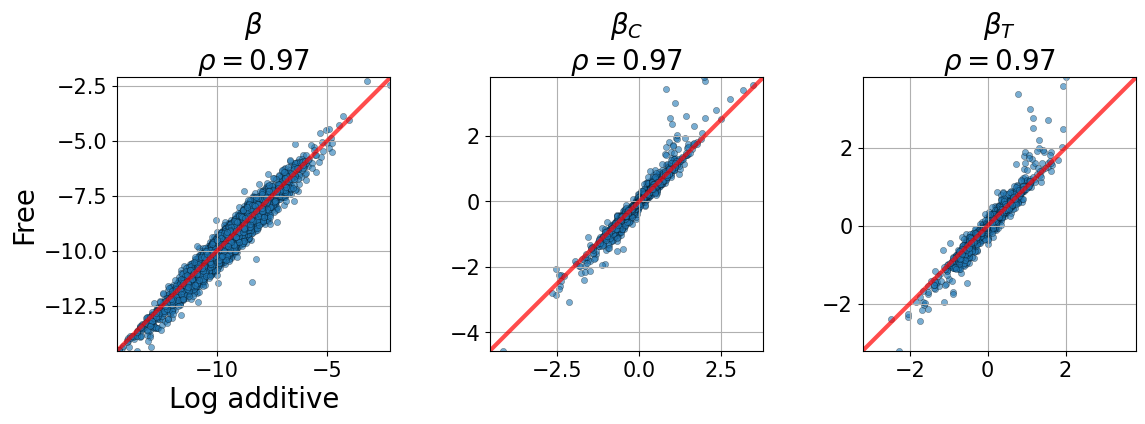

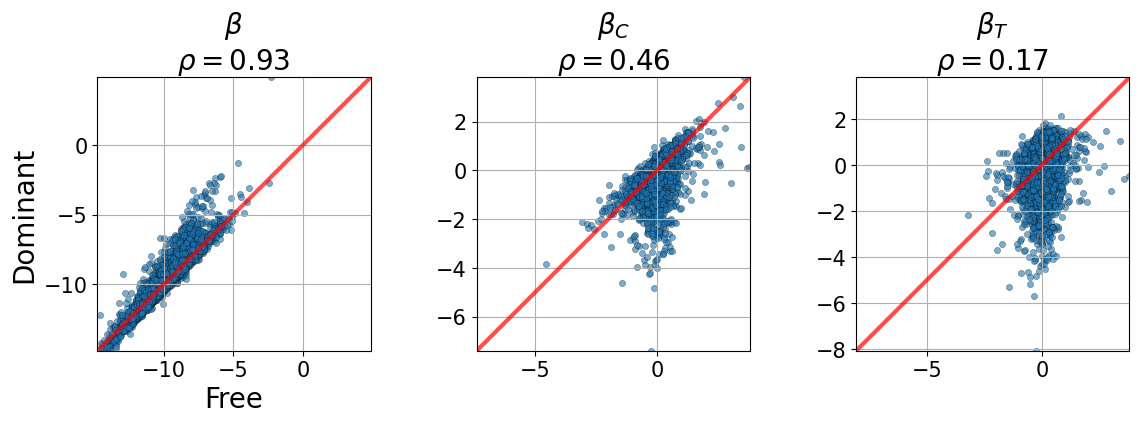

In [214]:
col_names = ['Intercept','beta_cis','beta_trans']
weight_dict = {'Intercept' : r"$\beta$",
                'beta_cis' : r"$\beta_C$",
                'beta_trans' : r"$\beta_T$"}


fig,ax = plt.subplots(1,3,figsize=(12,4))

for i,col in enumerate(col_names):
    x,y = weights_add[col].values,weights_dom[col]
    r_xy,_ = stats.pearsonr(x,y)
    ax[i].scatter(
        x, y,
        s=20,
        alpha=0.6,
        edgecolor='k',
        linewidth=0.3
    )

    # shared limits for true y=x line
    lims = [
        np.min([x.min(), y.min()]),
        np.max([x.max(), y.max()])
    ]

    ax[i].plot(lims, lims, color='red', linewidth=3, alpha=0.7)
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)


    ax[i].set_aspect('equal', adjustable='box')
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    
    ax[i].set_title(f"{weight_dict[col]}\n" + rf"$\rho = {r_xy:.2f}$",fontsize=20)
    ax[i].grid()
    
ax[0].set_xlabel('Log additive',fontsize=20)
ax[0].set_ylabel('Dominant',fontsize=20)
plt.tight_layout()
plt.show()

fig,ax = plt.subplots(1,3,figsize=(12,4))

for i,col in enumerate(col_names):
    x,y = weights_add[col].values,weights_free[col]
    r_xy,_ = stats.pearsonr(x,y)
    ax[i].scatter(
        x, y,
        s=20,
        alpha=0.6,
        edgecolor='k',
        linewidth=0.3
    )

    # shared limits for true y=x line
    lims = [
        np.min([x.min(), y.min()]),
        np.max([x.max(), y.max()])
    ]

    ax[i].plot(lims, lims, color='red', linewidth=3, alpha=0.7)
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)

    ax[i].set_aspect('equal', adjustable='box')
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].set_title(f"{weight_dict[col]}\n" + rf"$\rho = {r_xy:.2f}$",fontsize=20)
    ax[i].grid()
    
ax[0].set_xlabel('Log additive',fontsize=20)
ax[0].set_ylabel('Free',fontsize=20)
plt.tight_layout()
plt.show()


fig,ax = plt.subplots(1,3,figsize=(12,4))

for i,col in enumerate(col_names):
    x,y = weights_free[col].values,weights_dom[col]
    r_xy,_ = stats.pearsonr(x,y)
    ax[i].scatter(
        x, y,
        s=20,
        alpha=0.6,
        edgecolor='k',
        linewidth=0.3
    )

    # shared limits for true y=x line
    lims = [
        np.min([x.min(), y.min()]),
        np.max([x.max(), y.max()])
    ]

    ax[i].plot(lims, lims, color='red', linewidth=3, alpha=0.7)
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)

    ax[i].set_aspect('equal', adjustable='box')
    ax[i].tick_params(axis='both', which='major', labelsize=15)
    ax[i].set_title(f"{weight_dict[col]}\n" + rf"$\rho = {r_xy:.2f}$",fontsize=20)
    ax[i].grid()
    
ax[0].set_xlabel('Free',fontsize=20)
ax[0].set_ylabel('Dominant',fontsize=20)
plt.tight_layout()
plt.show()
    

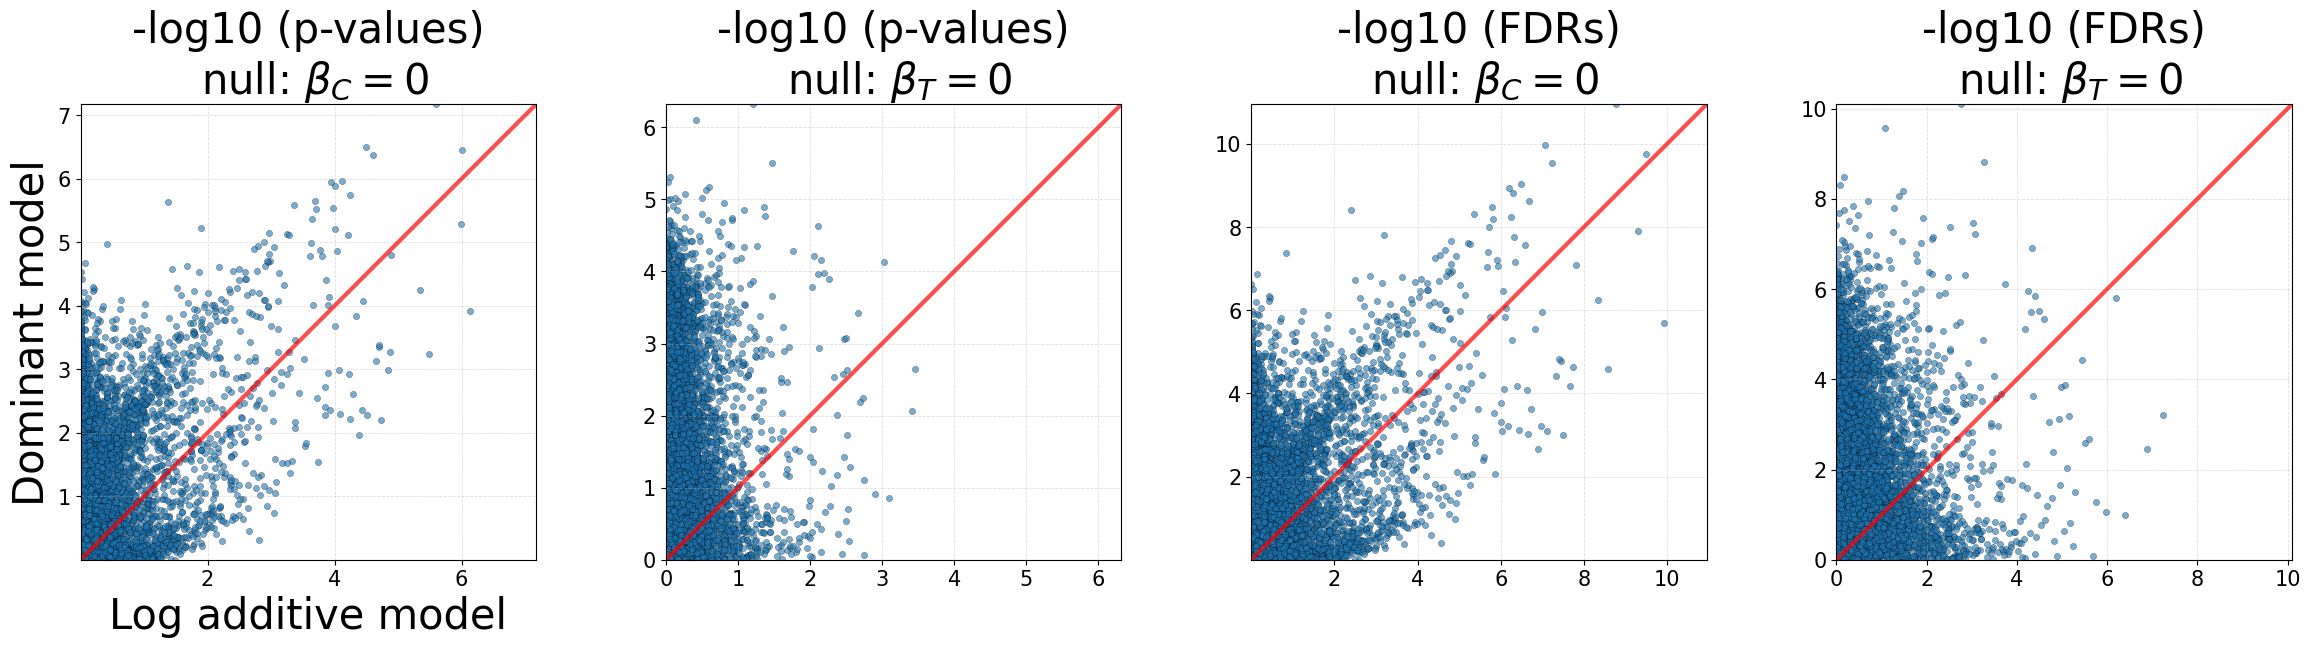

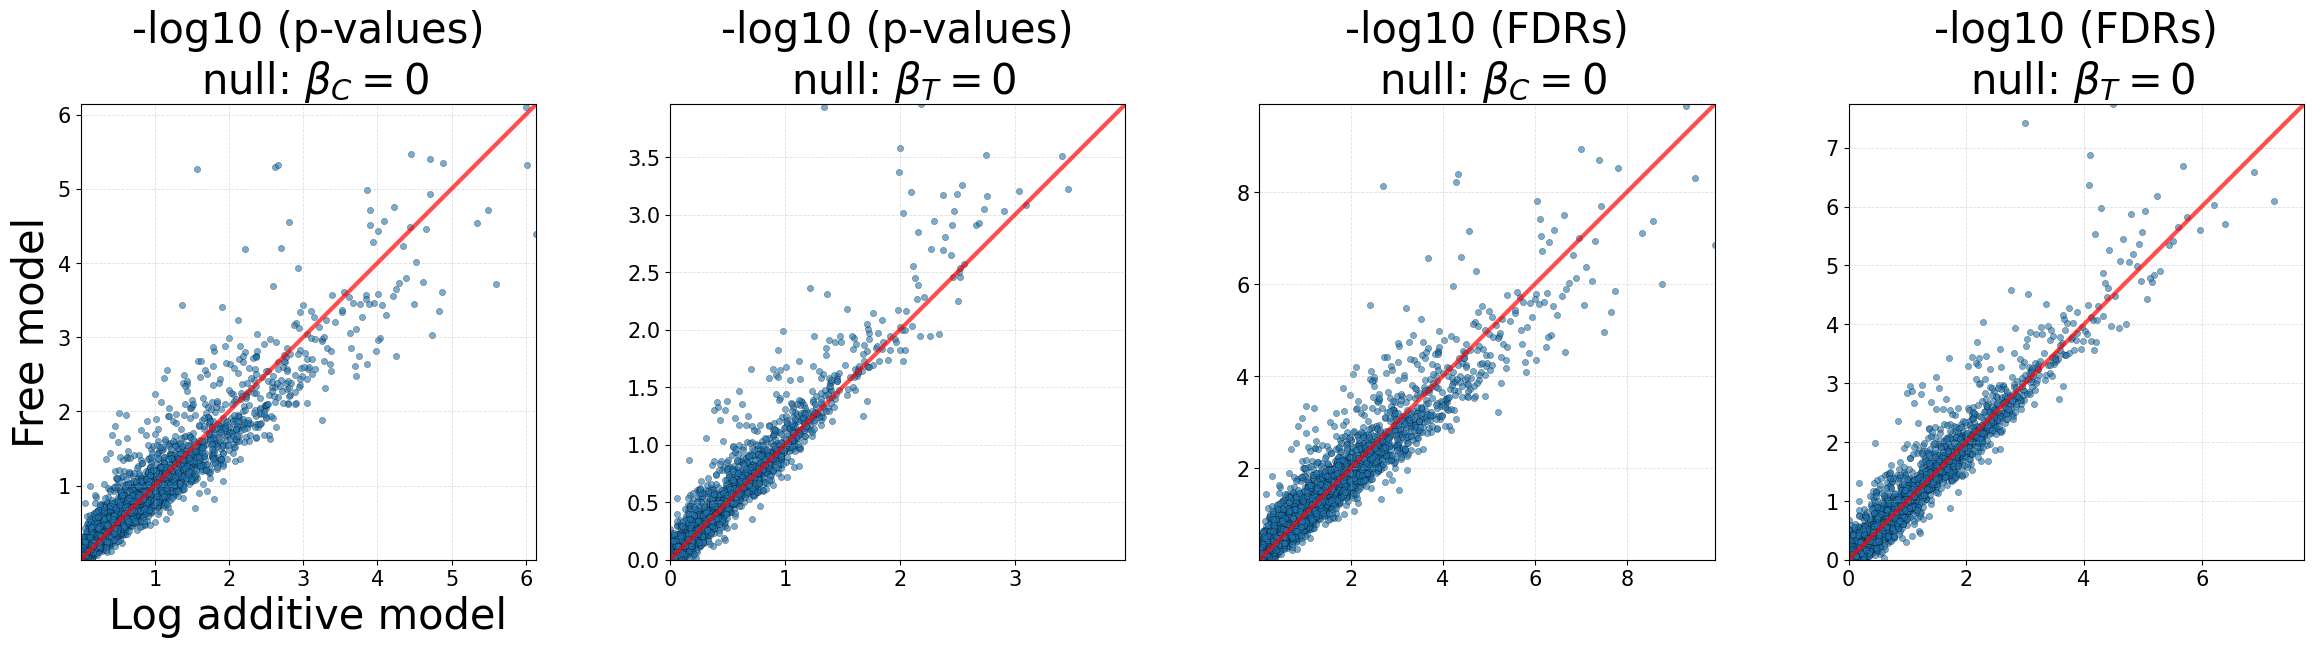

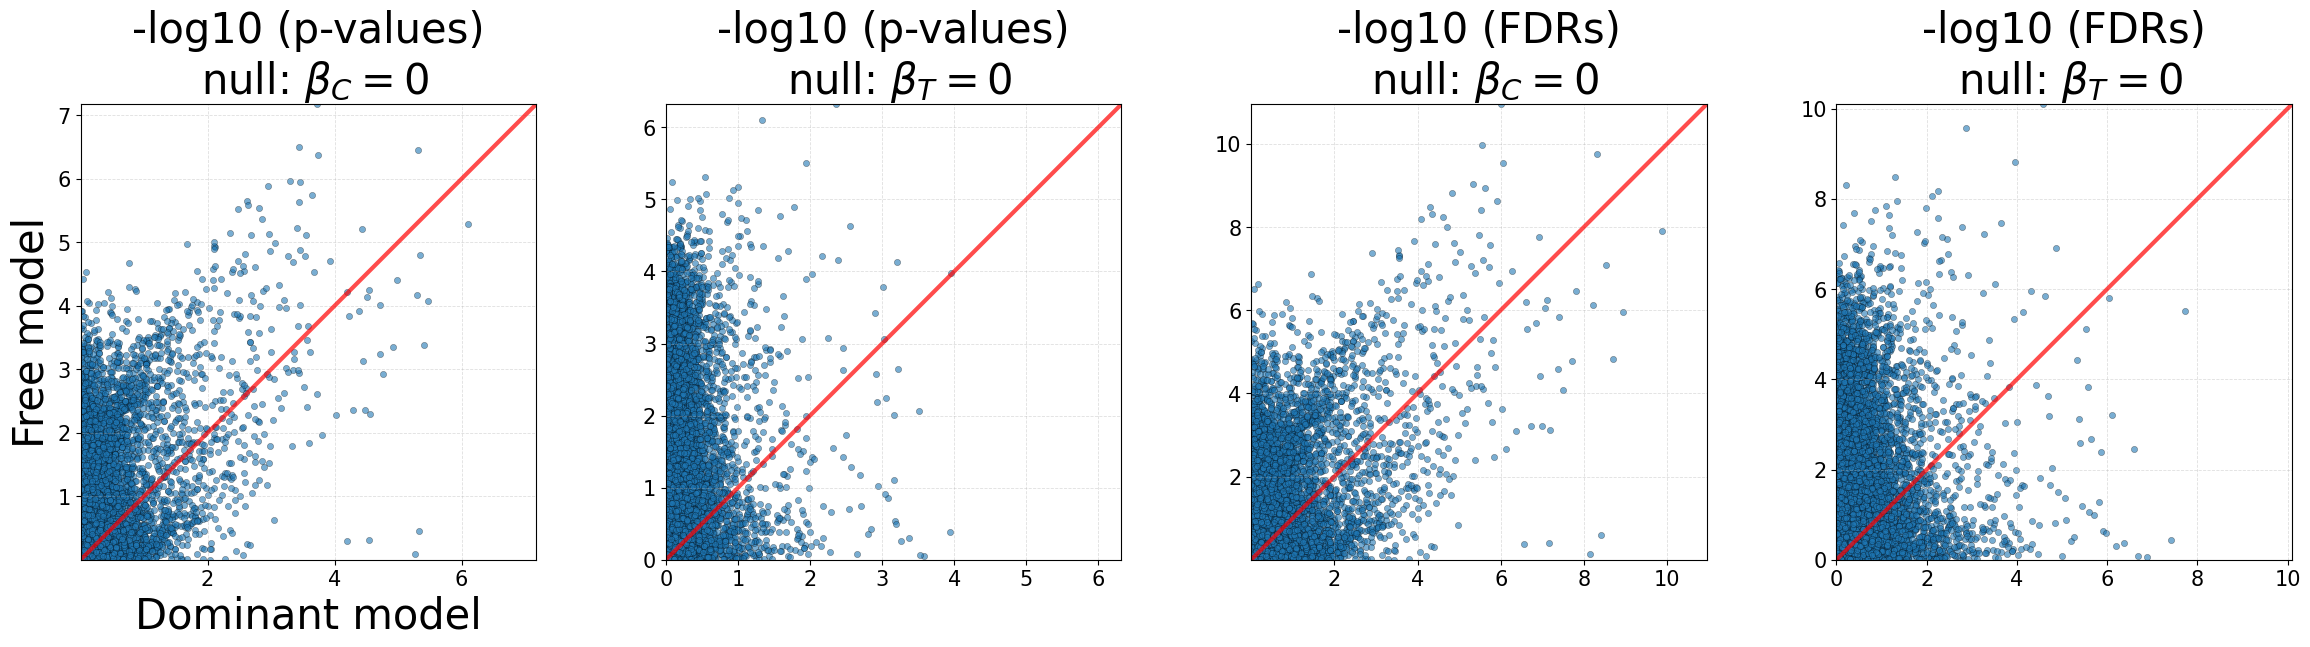

In [220]:
fs = 30
sig_names = ['raw_pval_beta_cis','raw_pval_beta_trans',
             'BH_FDR_beta_cis','BH_FDR_beta_trans']

sig_name_dict = {
    'raw_pval_beta_cis'   : f'-log10 (p-values)\n '+r'null: $\beta_C = 0$',
    'raw_pval_beta_trans': f'-log10 (p-values)\n '+r'null: $\beta_T = 0$',
    'BH_FDR_beta_cis'     : f'-log10 (FDRs)\n '+r'null: $\beta_C = 0$',
    'BH_FDR_beta_trans'  : f'-log10 (FDRs)\n '+r'null: $\beta_T = 0$',
    'logLik'             : r'-log10 Likelihood'
}

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

for i, col in enumerate(sig_names):

    if col not in ['dispersions', 'logLik']:
        x = -np.log10(sig_add[col].values)
        y = -np.log10(sig_dom[col].values)
    else:
        x = -sig_add[col].values
        y = -sig_dom[col].values

    ax[i].scatter(
        x, y,
        s=20,
        alpha=0.6,
        edgecolor='k',
        linewidth=0.3
    )

    # shared limits for true y=x line
    lims = [
        np.min([x.min(), y.min()]),
        np.max([x.max(), y.max()])
    ]

    ax[i].plot(lims, lims, color='red', linewidth=3, alpha=0.7)
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)

    ax[i].set_title(sig_name_dict[col], fontsize=fs)
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].tick_params(axis='both', which='major', labelsize=15)

    ax[i].grid(
        True,
        linestyle='--',
        linewidth=0.6,
        alpha=0.4
    )

ax[0].set_xlabel('Log additive model', fontsize=fs)
ax[0].set_ylabel('Dominant model', fontsize=fs)

plt.tight_layout()
plt.show()




fig, ax = plt.subplots(1, 4, figsize=(24, 6))

for i, col in enumerate(sig_names):

    if col not in ['dispersions', 'logLik']:
        x = -np.log10(sig_add[col].values)
        y = -np.log10(sig_free[col].values)
    else:
        x = -sig_add[col].values
        y = -sig_free[col].values

    ax[i].scatter(
        x, y,
        s=20,
        alpha=0.6,
        edgecolor='k',
        linewidth=0.3
    )

    # shared limits for true y=x line
    lims = [
        np.min([x.min(), y.min()]),
        np.max([x.max(), y.max()])
    ]

    ax[i].plot(lims, lims, color='red', linewidth=3, alpha=0.7)
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)

    ax[i].set_title(sig_name_dict[col], fontsize=fs)
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].tick_params(axis='both', which='major', labelsize=15)

    ax[i].grid(
        True,
        linestyle='--',
        linewidth=0.6,
        alpha=0.4
    )

ax[0].set_xlabel('Log additive model', fontsize=fs)
ax[0].set_ylabel('Free model', fontsize=fs)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 4, figsize=(24, 6))

for i, col in enumerate(sig_names):

    if col not in ['dispersions', 'logLik']:
        x = -np.log10(sig_free[col].values)
        y = -np.log10(sig_dom[col].values)
    else:
        x = -sig_free[col].values
        y = -sig_dom[col].values

    ax[i].scatter(
        x, y,
        s=20,
        alpha=0.6,
        edgecolor='k',
        linewidth=0.3
    )

    # shared limits for true y=x line
    lims = [
        np.min([x.min(), y.min()]),
        np.max([x.max(), y.max()])
    ]

    ax[i].plot(lims, lims, color='red', linewidth=3, alpha=0.7)
    ax[i].set_xlim(lims)
    ax[i].set_ylim(lims)

    ax[i].set_title(sig_name_dict[col], fontsize=fs)
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].tick_params(axis='both', which='major', labelsize=15)

    ax[i].grid(
        True,
        linestyle='--',
        linewidth=0.6,
        alpha=0.4
    )

ax[0].set_xlabel('Dominant model', fontsize=fs)
ax[0].set_ylabel('Free model', fontsize=fs)

plt.tight_layout()
plt.show()



In [180]:
# number per category
dict_ = {}
shared_genes = weights_add.index
                            
labels = ['log_additive','dominant','free'] 
for label in labels:
    
    if label == 'log_additive':
        df = pd.read_csv(f'../results/ballinger/BATcold_sig_{label}.csv',header=0)
    else:
        df = pd.read_csv(f'../results/ballinger/BATcold_sig_{label}.csv',header=0)
    df = df.set_index('Unnamed: 0')
    df = df.loc[shared_genes,:]
    print(len(df))

    no_cis = df['BH_FDR_beta_cis'].values
    no_trans = df['BH_FDR_beta_trans'].values
    
    cis = (no_cis<=0.05)&(no_trans>0.05)
    trans = (no_cis>0.05)&(no_trans<=0.05)
    cisandtrans = (no_cis<=0.05)&(no_trans<=0.05)
    conserved = (no_cis>0.05)&(no_trans>0.05)
    
    categories = np.array(['conserved']*len(cis))
    categories[cis] = 'cis'
    categories[trans] = 'trans'
    categories[cisandtrans] = 'cis&trans'
    
    dict_[label] = categories
    
    
sig_add = sig_add.loc[shared_genes,:]
weights_add = weights_add.loc[shared_genes,:]
dict_['Gene'] = shared_genes
df_reg = pd.DataFrame(dict_)

5970
5970
5970


In [182]:
# !wget https://raw.githubusercontent.com/vinsburg/alluvial_diagram/master/alluvial.py

import alluvial

In [183]:
df_add = df_reg.loc[:,['Gene','log_additive']]
df_dom = df_reg.loc[:,['Gene','dominant']]
df_free = df_reg.loc[:,['Gene','free']]
df_dom['Reg'] = df_dom['dominant']
df_add['Reg'] = df_add['log_additive']
df_free['Reg'] = df_free['free']

In [184]:
def plot_alluvian2(df1, df2, title, column, reg_groups, alluvial_colors, plot_log=False, s1 = 2, s2 = 8):
    num_overlap_dict = {r: {} for r in reg_groups}
    log_num_overlap_dict = {r: {} for r in reg_groups}

    # Calculate overlap counts and log-transformed counts
    for r1 in reg_groups:
        their_indices = df1[df1[column] == r1].index.values.flatten()
        for r2 in reg_groups:
            our_indices = df2[df2[column] == r2].index.values.flatten()
            num_overlap = len(set(their_indices).intersection(set(our_indices)))
            num_overlap_dict[r1][r2 + ' * '] = num_overlap
            log_num_overlap_dict[r1][r2 + ' * '] = np.log(num_overlap) if num_overlap != 0 else 0

    # Calculate total counts for each category on both sides
    left_totals = {r1: sum(overlaps.values()) for r1, overlaps in num_overlap_dict.items()}
    right_totals = {r2 + ' * ': sum(num_overlap_dict[r1][r2 + ' * '] for r1 in reg_groups) for r2 in reg_groups}

    # Add totals to the labels in num_overlap_dict and log_num_overlap_dict
    for r1 in reg_groups:
        left_label = f"{r1} ({left_totals[r1]})"
        num_overlap_dict[left_label] = num_overlap_dict.pop(r1)
        log_num_overlap_dict[left_label] = log_num_overlap_dict.pop(r1)
    
    for r2 in reg_groups:
        right_label = f"{r2} * ({right_totals[r2 + ' * ']})"
        for label_dict in [num_overlap_dict, log_num_overlap_dict]:
            for left_key in label_dict.keys():
                label_dict[left_key][right_label] = label_dict[left_key].pop(r2 + ' * ')

    # Plotting
    if plot_log:
        ax = alluvial.plot(log_num_overlap_dict, colors=alluvial_colors, alpha=0.9)
    else:
        ax = alluvial.plot(num_overlap_dict, colors=alluvial_colors, alpha=0.9)

    fig = ax.get_figure()
    fig.set_size_inches(s1, s2)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.show()

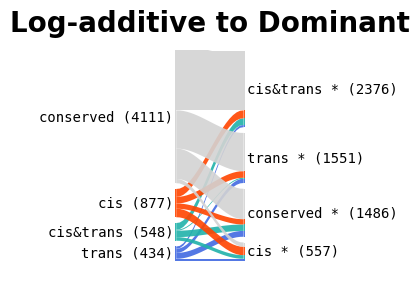

In [185]:
plot_alluvian2(df1=df_add,
               df2=df_dom,
              title="Log-additive to Dominant",
              s1=1,
              s2=3,
              column="Reg",
              reg_groups=["trans","cis&trans","cis","conserved"],
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

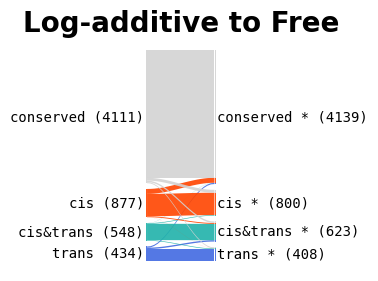

In [186]:
plot_alluvian2(df1=df_add,
               df2=df_free,
              title="Log-additive to Free",
              s1=1,
              s2=3,
              column="Reg",
              reg_groups=["trans","cis&trans","cis","conserved"],
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

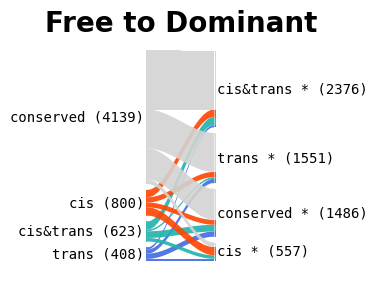

In [187]:
plot_alluvian2(df1=df_free,
               df2=df_dom,
              title="Free to Dominant",
              s1=1,
              s2=3,
              column="Reg",
              reg_groups=["trans","cis&trans","cis","conserved"],
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

In [188]:
# read in old results
assigned_bat_cold = pd.read_csv('../data/ballinger/BAT.MALE.COLD.categories.forplot.txt',sep=' ')
assigned_bat_cold = assigned_bat_cold.set_index( 'Unnamed: 0' )
genes_bat_cold = np.sort(assigned_bat_cold.index.values)
assigned_bat_cold = assigned_bat_cold.loc[ genes_bat_cold, :]



In [189]:
reg_map = {'Amb&Conserved' : 'conserved', 'TRANS_ONLY' : 'trans', 'CIS_ONLY' : 'cis', 'Cis&Trans' : 'cis&trans'} 
assigned_bat_cold['Reg'] = assigned_bat_cold['Amb&Conserved'].map(reg_map)
df_old = df_free.copy()
df_old['Reg'] = assigned_bat_cold['Reg'].values

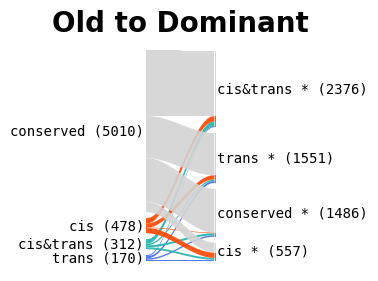

In [190]:
plot_alluvian2(df1=df_old,
               df2=df_dom,
              title="Old to Dominant",
              s1=1,
              s2=3,
              column="Reg",
              reg_groups=["trans","cis&trans","cis","conserved"],
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);

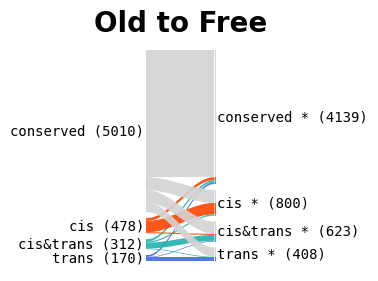

In [195]:
plot_alluvian2(df1=df_old,
               df2=df_free,
              title="Old to Free",
              s1=1,
              s2=3,
              column="Reg",
              reg_groups=["trans","cis&trans","cis","conserved"],
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False)


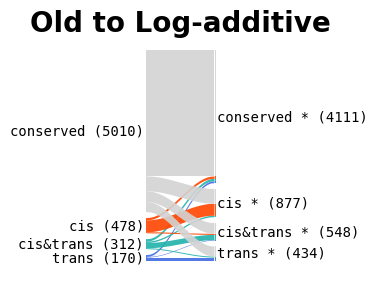

0.32621903127868423


In [194]:
plot_alluvian2(df1=df_old,
               df2=df_add,
              title="Old to Log-additive",
              s1=1,
              s2=3,
              column="Reg",
              reg_groups=["trans","cis&trans","cis","conserved"],
              alluvial_colors = ['royalblue','lightseagreen','orangered','lightgray'],
              plot_log=False);


In [199]:
# adjusted rand indices
a = adjusted_rand_score(df_old.Reg.values,df_add.Reg.values)
b = adjusted_rand_score(df_old.Reg.values,df_dom.Reg.values)
c = adjusted_rand_score(df_old.Reg.values,df_free.Reg.values)
d = adjusted_rand_score(df_add.Reg.values,df_free.Reg.values)
e = adjusted_rand_score(df_add.Reg.values,df_dom.Reg.values)

# percent same classification
a = sum(df_old.Reg.values==df_add.Reg.values)/len(df_old)
b = sum(df_old.Reg.values==df_dom.Reg.values)/len(df_old)
c = sum(df_old.Reg.values==df_free.Reg.values)/len(df_old)
d = sum(df_add.Reg.values==df_free.Reg.values)/len(df_old)
e = sum(df_add.Reg.values==df_dom.Reg.values)/len(df_old)


print('ARI:') 
print(f'Old and Log-additive: {a:.4f}')
print(f'Old and Dominant: {b:.4f}')
print(f'Old and Free: {c:.4f}')
print(f'Log-additive and Free: {d:.4f}')
print(f'Log-additive and Dominant: {e:.4f}')

ARI:
Old and Log-additive: 0.3262
Old and Dominant: 0.0327
Old and Free: 0.3314
Log-additive and Free: 0.8005
Log-additive and Dominant: 0.0795


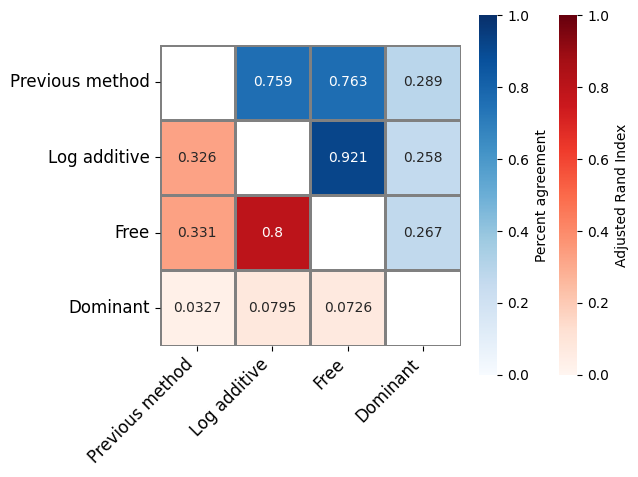

In [208]:
models = ['Previous method', 'Log additive', 'Free', 'Dominant']

regs = {
    'Previous method': df_old.Reg.values,
    'Log additive': df_add.Reg.values,
    'Free': df_free.Reg.values,
    'Dominant': df_dom.Reg.values
}

n = len(models)

ari = np.full((n, n), np.nan)
pct_same = np.full((n, n), np.nan)

for i in range(n):
    for j in range(n):
        if i > j:
            ari[i, j] = adjusted_rand_score(regs[models[i]], regs[models[j]])
        elif i < j:
            pct_same[i, j] = np.mean(regs[models[i]] == regs[models[j]])

heatmap_vals = np.where(~np.isnan(ari), ari, pct_same)
annot = np.empty_like(heatmap_vals, dtype=object)

for i in range(n):
    for j in range(n):
        if i == j:
            annot[i, j] = ""
        else:
            annot[i, j] = f"{heatmap_vals[i, j]:.3g}"

n = len(models)

mask_ari = np.triu(np.ones((n, n), dtype=bool))   
mask_pct = np.tril(np.ones((n, n), dtype=bool))   
annot_ari = np.empty_like(ari, dtype=object)
annot_pct = np.empty_like(pct_same, dtype=object)

for i in range(n):
    for j in range(n):
        annot_ari[i, j] = "" if mask_ari[i, j] else f"{ari[i, j]:.3g}"
        annot_pct[i, j] = "" if mask_pct[i, j] else f"{pct_same[i, j]:.3g}"
        
        
        
fig, ax = plt.subplots(figsize=(6.5, 5.5))


sns.heatmap(
    ari,
    mask=mask_ari,
    cmap="Reds",
    vmin=0,
    vmax=1,
    square=True,
    annot=annot_ari,
    fmt="",
    cbar=True,
    cbar_kws={
        "label": "Adjusted Rand Index",
        "shrink": 0.8
    },
    ax=ax
)


sns.heatmap(
    pct_same,
    mask=mask_pct,
    cmap="Blues",
    vmin=0,
    vmax=1,
    square=True,
    annot=annot_pct,
    fmt="",
    cbar=True,
    linewidths=1,
    linecolor="gray",
    cbar_kws={
        "label": "Percent agreement",
        "shrink": 0.8
    },
    ax=ax
)

ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(models, rotation=0, fontsize=12)

# ax.set_title("Model agreement comparison", fontsize=16, pad=12)

plt.tight_layout()
plt.show()



In [196]:
a = sum(df_old.Reg.values==df_add.Reg.values)/len(df_old)
b = sum(df_old.Reg.values==df_dom.Reg.values)/len(df_old)
c = sum(df_old.Reg.values==df_free.Reg.values)/len(df_old)
d = sum(df_add.Reg.values==df_free.Reg.values)/len(df_old)
e = sum(df_add.Reg.values==df_dom.Reg.values)/len(df_old)
print('The percent of genes with the same classification:') 
print(f'Old and Log-additive: {a:.4f}')
print(f'Old and Dominant: {b:.4f}')
print(f'Old and Free: {c:.4f}')
print(f'Log-additive and Free: {d:.4f}')
print(f'Log-additive and Dominant: {e:.4f}')

The percent of genes with the same classification:
Old and Log-additive: 0.7586
Old and Dominant: 0.2889
Old and Free: 0.7633
Log-additive and Free: 0.9213
Log-additive and Dominant: 0.2581
